# Importing modules


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt


# reading from the dataframe/The csv File

In [6]:
#reading the first 5 records of the dataset from the dataframe  using the "head()" function
df=pd.read_csv("supermarket_sales - Sheet1.csv")
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
#Droping some columns from the dataset  namely . Time, cogs,Gross margin percentage, gross income and rating
df=df.drop(['Time','cogs','gross margin percentage','gross income','Rating'],axis=1)
#saving the changes to a new excel file
df.to_excel("supermarket_sales.xlsx",index=False)

In [2]:
#reading the first 3 records  from the new dataframe
df2=pd.read_excel("supermarket_sales.xlsx")
df2.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card


In [12]:
#having a look at the datatypes of each collumn in the dataframe
df2.dtypes

Invoice ID        object
Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Tax 5%           float64
Total            float64
Date              object
Payment           object
dtype: object

# Aswering Questions arising from the data in the dataframe

# Q1. Which payment method was mostly used by customer by considering total sales through each payment method. Plot a pie chart to visualize your answer.

In [5]:
payment_methods=df2["Payment"].unique()
print(f"*****Bellow are the {len(payment_methods)} payment methods::: ")
for payment_method in payment_methods:
     print(payment_method)

*****Bellow are the 3 payment methods::: 
Ewallet
Cash
Credit card


In [6]:
payment_methods_total_sales_list=[]
total_sales=0
for payment_method in payment_methods:
    payment_method_total_sales=0
    for i in range(len(df2)):
        if df2.loc[i].Payment==payment_method:
            payment_method_total_sales+=df2.loc[i].Total
    print(f"{payment_method} sales  : {payment_method_total_sales.round()}")
    total_sales+=payment_method_total_sales
    payment_methods_total_sales_list.append(payment_method_total_sales.round())
print(f"Total sales amounted to: {total_sales.round()}")

Ewallet sales  : 109993.0
Cash sales  : 112207.0
Credit card sales  : 100767.0
Total sales amounted to: 322967.0


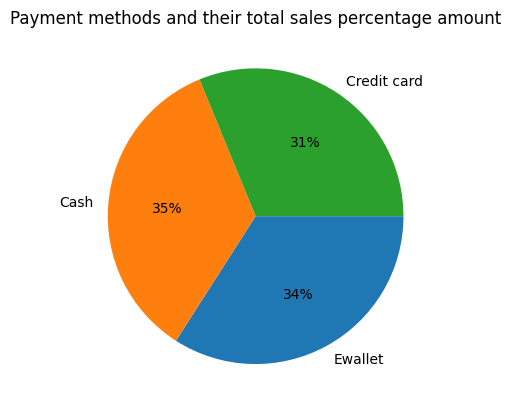

In [7]:
#plotting the piechart
sizes=payment_methods_total_sales_list
labels=payment_methods
plt.title("Payment methods and their total sales percentage amount")
plt.pie(sizes,labels=labels,
       autopct="%1.f%%"
       ,counterclock=False)
plt.show()

# Q2.Create a months and year columns from the date column , then drop the date column

In [24]:
#creating the month column 
df2["month"]=df2["Date"].astype(str).apply(lambda x:x.split("/")[1])
#creating the year column
df2['Year']=df2["Date"].astype(str).apply(lambda x:x.split("/")[2])
#Droping the date column
df2=df2.drop(["Date"],axis=1)
#saving the new dataframe as an excel file
df2.to_excel("supermarket_sales.xlsx",index=False)

In [25]:
df2.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,5,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,8,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,3,2019


# Q3. You are required to compare product lines total sales and visualize the same using a piechart for the whole year

In [34]:
df2=pd.read_excel("supermarket_sales.xlsx")
product_lines=df2['product_line'].unique()

In [40]:
total_anual_sales=0
product_line_sales_list=[]
#looping through the list of product lines
for product_line in product_lines:
    product_line_total_sales=0
    #looping through the entire dataframe
    for i in range(len(df2)):
        #Decision making 
        if df2.loc[i].product_line==product_line:
            product_line_total_sales+=df2.loc[i].Total
    print(f"{product_line} total sales: {product_line_total_sales.round()}")
    product_line_sales_list.append(product_line_total_sales)
    total_anual_sales+=product_line_total_sales
print(f"Total anual sales amounted to: {total_anual_sales.round()}")

Health and beauty total sales: 49194.0
Electronic accessories total sales: 54338.0
Home and lifestyle total sales: 53862.0
Sports and travel total sales: 55123.0
Food and beverages total sales: 56145.0
Fashion accessories total sales: 54306.0
Total anual sales amounted to: 322967.0


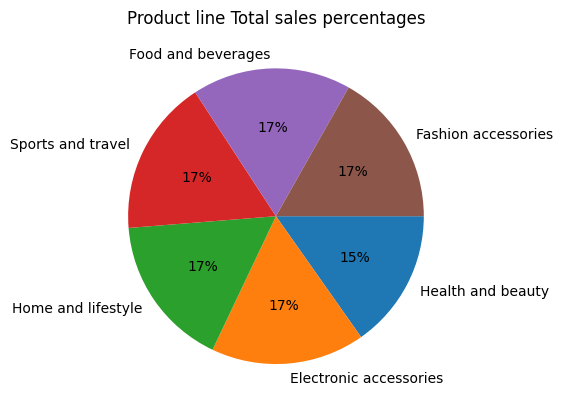

In [47]:
#ploting the outcome
labels=product_lines
sizes=product_line_sales_list
plt.pie(sizes,labels=labels,autopct='%1.f%%',counterclock=False)
plt.title("Product line Total sales percentages")
plt.show()